In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
#kallge ka api command hai ..isse ka use kerke kaggle ka data directly fetch ker sakte hai
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:07<00:00, 102MB/s] 
100% 1.06G/1.06G [00:07<00:00, 147MB/s]


In [ ]:
#ab humare pass jo data aaaya hai ushko unzip kerna padega
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', "r")
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D ,Flatten

In [ ]:
import tensorflow as tf
from tensorflow import keras

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',  # Fixed spelling
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',  # Fixed spelling
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds= train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#create cnn model
model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3), activation = 'relu', padding = "valid", input_shape = (256,256,3) ))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid' ))

model.add(Conv2D(64, kernel_size =(3,3), activation = 'relu', padding = "valid" ))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid' ))

model.add(Conv2D(128, kernel_size =(3,3), activation = 'relu', padding = "valid"))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid' ))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)
history

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 73ms/step - accuracy: 0.5726 - loss: 0.7222 - val_accuracy: 0.7048 - val_loss: 0.5793
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 106ms/step - accuracy: 0.7254 - loss: 0.5430 - val_accuracy: 0.7702 - val_loss: 0.4906
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 77ms/step - accuracy: 0.8056 - loss: 0.4145 - val_accuracy: 0.7622 - val_loss: 0.5422
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 67ms/step - accuracy: 0.8870 - loss: 0.2681 - val_accuracy: 0.7612 - val_loss: 0.7744
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.9457 - loss: 0.1373 - val_accuracy: 0.7468 - val_loss: 0.9700
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 73ms/step - accuracy: 0.9667 - loss: 0.0934 - val_accuracy: 0.7558 - val_loss: 1.2279
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 66ms/step - accuracy: 0.9813 - loss: 0.0573 - val_accuracy: 0.7586 - val_loss: 1.3820
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 73ms/step - accuracy: 0.9836 - loss: 0.0475 -

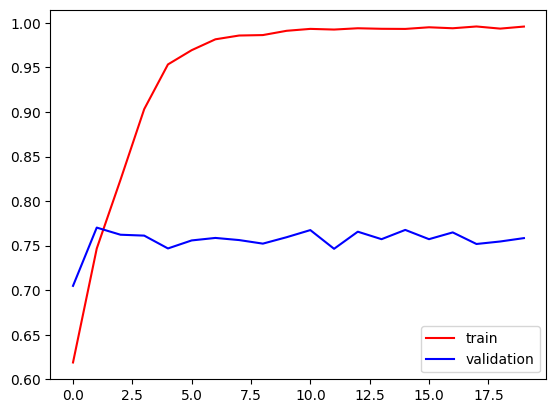

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()